# Getting started with the WRF-4km data of the South America Affinity group 

The WRF simulation was run by the South America Affinity Group (SAAG): https://ral.ucar.edu/projects/south-america-affinity-group-saag 

Reference: [Dominguez et al., 2024](https://journals.ametsoc.org/view/journals/bams/105/1/BAMS-D-22-0226.1.xml)

The data spans over 20 years (2000-2020), has a horizontal resolution of 4 km and a temporal resolution of 60 minutes. 

In [3]:
from pathlib import Path 
import xarray as xr 

In [4]:
path  = Path('/glade/campaign/univ/uiuc0017/chliu/WRF4KM_2000-2020/wrf2d_wrf3d/')

### Output files 

- The data directory contains
- hourly 2d files: wrf3d_d01_yyyy-mm-dd_hh0000
- 3-hourly 3d files: wrf2d_d01_yyyy-mm-dd_hh0000 

### Read in constants (invariant fields, e.g. land mask, land types and coordinates)

In [37]:
ds_coords = xr.open_dataset( Path('/glade/campaign/univ/uiuc0017/chliu/WRF4KM_2000-2020/wrf2d_wrf3d/wrfconstants_SAAG_20yr.nc')) 
lat = ds_coords.XLAT.squeeze().values
lon = ds_coords.XLONG.squeeze().values

### Read in data for a day 

In [24]:
year = 2016 
month = 11 
day = 21 

subdir = Path( str(year)) 
fnames = list( (path / subdir).glob( ('wrf2d_d01_' + str(year) + '-' + str(month).zfill(2) + '-' + str(day).zfill(2) + '*')))
fnames.sort()

print(len(fnames), 'files for', str(year), str(month), str(day))

24 files for 2016 11 21


In [ ]:
ds = xr.open_mfdataset(fnames,combine='nested', concat_dim= 'Time' )

In [52]:
ds

<xarray.Dataset> Size: 63GB
Dimensions:         (Time: 24, south_north: 2027, west_east: 1471,
                     soil_layers_stag: 4, snow_layers_stag: 3,
                     snso_layers_stag: 7)
Coordinates:
    XTIME           (Time) datetime64[ns] 192B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: Time, south_north, west_east, soil_layers_stag,
                                snow_layers_stag, snso_layers_stag
Data variables: (12/201)
    Times           (Time) |S19 456B dask.array<chunksize=(1,), meta=np.ndarray>
    Q2              (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    T2              (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    TH2             (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    PSFC            (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    U10             (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    ...              ...
    totalVap        (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    REFL_10CM       (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    QVAPOR          (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    U               (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    V               (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
    W               (Time, south_north, west_east) float32 286MB dask.array<chunksize=(1, 1014, 736), meta=np.ndarray>
Attributes: (12/152)
    TITLE:                            OUTPUT FROM WRF V4.1.5 MODEL
    START_DATE:                      2016-11-16_00:00:00
    SIMULATION_START_DATE:           1999-12-31_00:00:00
    WEST-EAST_GRID_DIMENSION:        1472
    SOUTH-NORTH_GRID_DIMENSION:      2028
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    ETAC:                            0.2
    Source_Code:                     make_SAAG_2d_1.csh
    FileGenerated:                   20220427
    Project:                         South America Project
    Division:                        NCAR/RAL/HAP
    Contacts:                        CHANGHAI LIU (chliu@ucar.edu), KYOKO IKE...

### Plot data over Amazon basin, for example the total precipitation on that day

In [42]:
precip = ds.PREC_ACC_NC.sum('Time').compute()

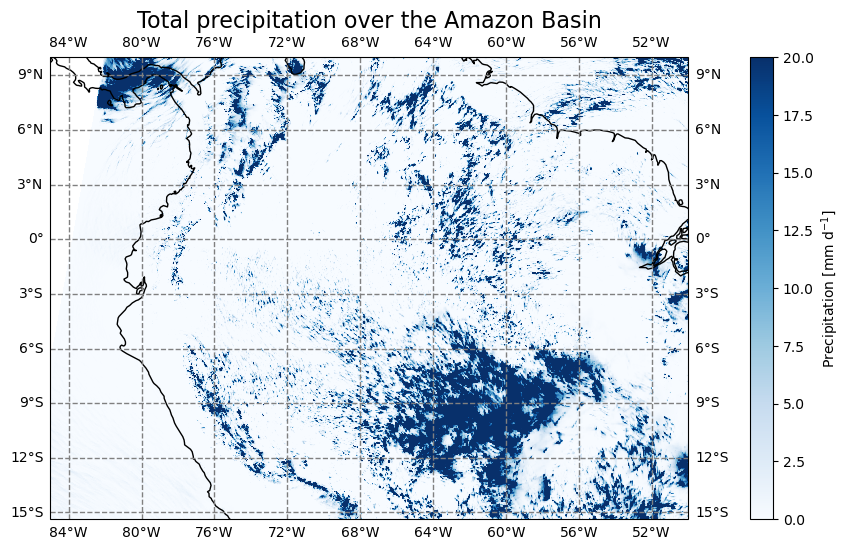

In [50]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader


# Subset data for Amazon Basin 
amazon_lat_min = -15
amazon_lat_max = 10
amazon_lon_min = -85
amazon_lon_max = -50

fig = plt.figure(figsize=(16, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
norm = mcolors.LogNorm(1e-1, 1)


ax.add_feature(cfeature.COASTLINE)
ax.set_extent([amazon_lon_min, amazon_lon_max, amazon_lat_min, amazon_lat_max]) 

c = ax.pcolormesh(lon, lat, precip,
                  cmap='Blues', vmax = 20, transform=ccrs.PlateCarree())

fig.colorbar(c, ax=ax, label='Precipitation [mm d$^{-1}$]')

# Add rivers 
ax.add_feature(cfeature.RIVERS, edgecolor='darkgreen', facecolor='none', linewidth=0.0)

# Add gridlines with latitude and longitude labels
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
gl.xlocator = plt.MaxNLocator(integer=True)
gl.ylocator = plt.MaxNLocator(integer=True)

ax.set_title('Total precipitation over the Amazon Basin', fontsize=16)
plt.show()

### Read in 3D data 

In [55]:
subdir = Path( str(year)) 
fnames = list( (path / subdir).glob( ('wrf3d_d01_' + str(year) + '-' + str(month).zfill(2) + '-' + str(day).zfill(2) + '*')))
fnames.sort()

In [57]:
wrf3d = xr.open_mfdataset(fnames,combine='nested', concat_dim= 'Time' )

### Plot along the vertical dimension (e.g., diurnal evolution of temperature) for a specific point

#### Andes altiplano

In [100]:
# find index for lat, lon value (since these are not dimensions of the data)
lat_pt = -50
lon_pt = -75
abs_diff = abs(lat - lat_pt) + abs(lon- lon_pt)
lat_idx, lon_idx = np.unravel_index(abs_diff.argmin(), abs_diff.shape)

selected_location = wrf3d.sel(south_north=lat_idx, west_east=lon_idx)
temp = selected_location.TK.compute()
temp.dims

('Time', 'bottom_top')

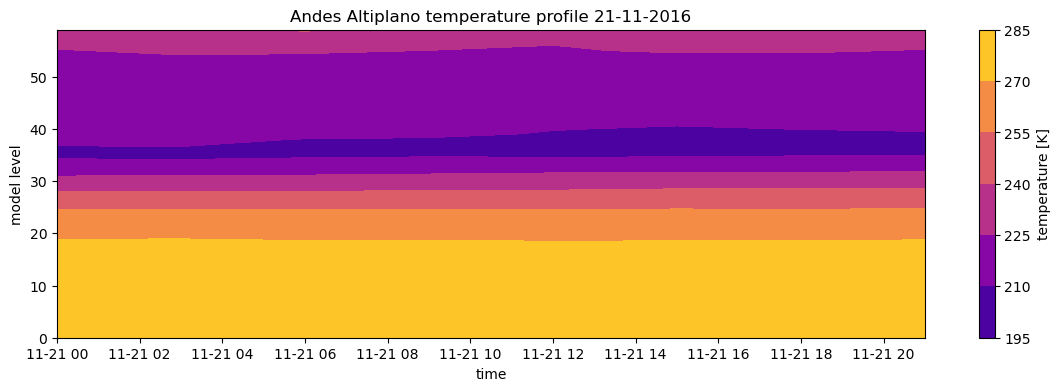

In [101]:
plt.figure(figsize= (14,4)) 

m = plt.contourf(wrf3d.XTIME.values, temp.bottom_top.values,  temp.T, vmin = 190, vmax = 290, cmap = 'plasma')
plt.title('Andes Altiplano temperature profile 21-11-2016')
plt.xlabel('time')
plt.ylabel('model level')
plt.colorbar(m , label = 'temperature [K]')
plt.show()

#### Amazonas 

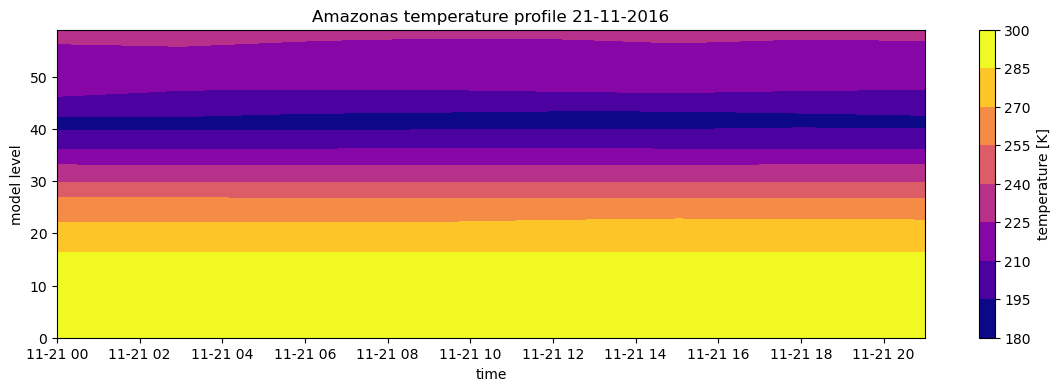

In [99]:
lat_pt = -3
lon_pt = -15
abs_diff = abs(lat - lat_pt) + abs(lon- lon_pt)
lat_idx, lon_idx = np.unravel_index(abs_diff.argmin(), abs_diff.shape)

selected_location = wrf3d.sel(south_north=lat_idx, west_east=lon_idx)
temp = selected_location.TK.compute()

plt.figure(figsize= (14,4)) 

m = plt.contourf(wrf3d.XTIME.values, temp.bottom_top.values,  temp.T, vmin = 190, vmax = 290, cmap = 'plasma')
plt.title('Amazonas temperature profile 21-11-2016')
plt.xlabel('time')
plt.ylabel('model level')
plt.colorbar(m , label = 'temperature [K]')
plt.show()